In [1]:
%matplotlib inline
# %matplotlib widget # 跟圖互動，可以用點選圖片中的某位置觸發程式
# %env KERAS_BACKEND=tensorflow
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib as mpl
# from ipywidgets import interact, IntSlider, Button
# from ipywidgets import interact_manual

In [2]:
def generate_data(len_of_data, dim = 2, draw = True, random_rate = 0.):
    if random_rate > 0:
        if random_rate > 1:
            random_rate = 1
        len_of_mistake_data = int(random_rate * len_of_data)
        if len_of_mistake_data == 0:
            len_of_mistake_data = 1
    else:
        len_of_mistake_data = 0
    
    xs = 2*(np.random.rand(1) + 1)*(np.random.rand(len_of_data, dim)-1) + np.random.randint(10, size=(dim,))-5

    means = np.mean(xs, axis=0)
    normal_vector = np.tan((np.random.rand(dim)-0.5)*np.pi) + np.random.rand(1)
    unit_vector = np.zeros(dim).astype(float)
    unit_vector[0] = 1.
    if np.dot(unit_vector, normal_vector)<=0:
        normal_vector *= -1
    if dim == 2 and draw:
        if round(normal_vector[1],2) == 0.:
            normal_vector[1]=0.1
    bias = np.dot(normal_vector, means)# + np.random.rand(1) - 0.5
    
    labels = np.sign(np.matmul(xs, normal_vector) - bias).astype(float)
    if len_of_mistake_data > 0:
        shuffle = np.arange(len_of_data)
        np.random.shuffle(shuffle)
        np.random.shuffle(shuffle)
        for idx in range(len_of_mistake_data):
            labels[shuffle[idx]] *= -1

    if dim == 2 and draw:
        print("data:")
        plt.scatter(xs[:, 0], xs[:, 1], c=labels)
        x = np.linspace(min(xs[:, 0])-0.1, max(xs[:, 0])+0.1, 2)
        plt.plot(x, (-1 * x * normal_vector[0] + bias)/normal_vector[1])
        # plt.colorbar()
        plt.show()
    return (xs, labels)

def PLA(xs, labels, history_draw = True, epochs = 10000): # , modify_version_of_PLA = True):
    len_of_data, dim = xs.shape
    w = np.random.randint(5, size=(dim+1,)).astype(float)
    unit_vector = np.zeros(dim).astype(float)
    unit_vector[0] = 1.
    if np.dot(unit_vector, w[1:])<=0:
        w *= -1
    # w = np.zeros(dim+1).astype(float)
    best_len_of_mistakes = len_of_data
    best_w = w.copy()
    if dim != 2:
        history_draw = False

    epoch = 0
    for epoch in range(epochs):
        correct_indexs = []
        mistake_indexs = []
        for j in range(len_of_data):
            if np.sign(np.dot(xs[j], w[1:]) + w[0]) * labels[j] < 0:
                mistake_indexs.append(j)
            else:
                correct_indexs.append(j)
        len_of_mistakes = len(mistake_indexs)
        if len_of_mistakes == 0:
            best_len_of_mistakes = len_of_mistakes
            best_w = w.copy()
            # print(len_of_data, best_len_of_mistakes, len_of_mistakes)
            if epoch > 0:
                epoch -= 1
            break

        # print(len_of_data, best_len_of_mistakes, len_of_mistakes)

        if dim == 2 and history_draw and (epoch<10 or epoch%(int(epochs/10))==0 ):
            x = np.linspace(min(xs[:, 0])-0.1, max(xs[:, 0])+0.1, 2)
            if round(w[2],8) == 0.:
                plt.plot(x, -1 * (x * w[1] + w[0])/0.000001, color='green', label='prev')
            else:
                plt.plot(x, -1 * (x * w[1] + w[0])/w[2], color='green', label='prev')
            for idx in range(len_of_mistakes):
                plt.scatter(xs[mistake_indexs[idx], 0], xs[mistake_indexs[idx], 1], color='r', s=[70])

        # print((best_len_of_mistakes > len_of_data * 0.5))
        # print((len_of_mistakes <= best_len_of_mistakes * 1.5),"\n\n")
        # if (len_of_mistakes <= best_len_of_mistakes * 1.5) or (best_len_of_mistakes > len_of_data * 0.5):
        if len_of_mistakes <= best_len_of_mistakes:
            best_len_of_mistakes = len_of_mistakes
            best_w = w.copy()
        idx = np.random.randint(len_of_mistakes)
        sidx = mistake_indexs[idx]
        w[1:] = w[1:] + labels[sidx] * xs[sidx]
        w[0] += labels[sidx]
        unit_vector = np.zeros(dim).astype(float)
        unit_vector[0] = 1.
        if np.dot(unit_vector, w[1:])<=0:
            w *= -1

        if dim == 2 and history_draw and (epoch<10 or epoch%(int(epochs/10))==0 ):
            print("epoch = ", epoch)
            print(w)
            plt.scatter(xs[:, 0], xs[:, 1], c=labels)
            x = np.linspace(min(xs[:, 0])-0.1, max(xs[:, 0])+0.1, 2)
            # plt.plot(x, (-1 * x * normal_vector[0] + bias)/normal_vector[1])
            if round(w[2],8) == 0.:
                plt.plot(x, -1 * (x * w[1] + w[0])/0.000001, label='update')
            else:
                plt.plot(x, -1 * (x * w[1] + w[0])/w[2], label='update')
            plt.legend()
            plt.show()

    print("epoch = ", epoch, "Final")
    if dim == 2:
        plt.scatter(xs[:, 0], xs[:, 1], c=labels)
        x = np.linspace(min(xs[:, 0])-0.1, max(xs[:, 0])+0.1, 2)
        # plt.plot(x, (-1 * x * normal_vector[0] + bias)/normal_vector[1])
        if round(best_w[2],8) == 0.:
            plt.plot(x, -1 * (x * best_w[1] + best_w[0])/0.000001)
        else:
            plt.plot(x, -1 * (x * best_w[1] + best_w[0])/best_w[2])
        plt.show()
    return best_w

data:


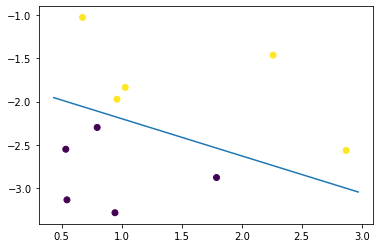

epoch =  0
[ 3.          0.79510323 -0.29920922]


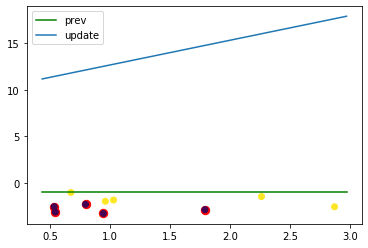

epoch =  1
[2.         0.26151741 2.25216122]


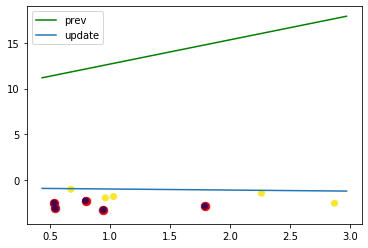

epoch =  2
[3.         0.93448787 1.22483362]


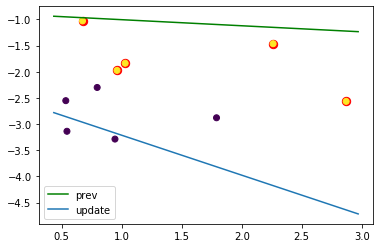

epoch =  3
[2.         0.13938465 3.52404284]


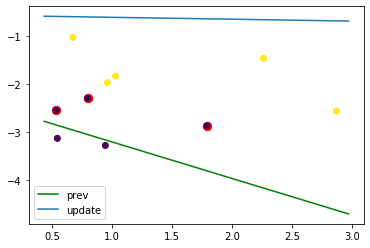

epoch =  4
[3.         2.40080205 2.06098263]


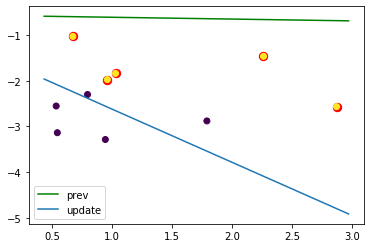

epoch =  5
[2.         0.61102023 4.93938174]


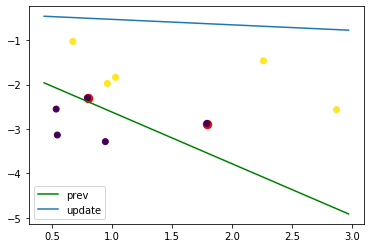

epoch =  6
[3.         1.57125705 2.96627135]


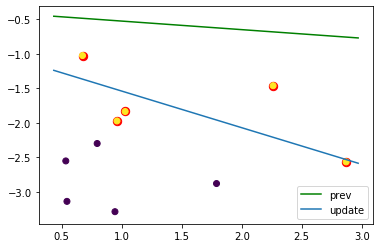

epoch =  7
[4.         4.44148998 0.40127817]


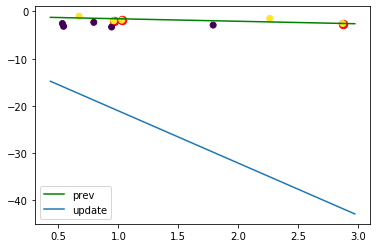

epoch =  8
[3.         3.49806098 3.68664475]


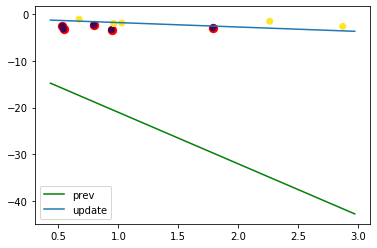

epoch =  9
[4.         4.52649741 1.85033933]


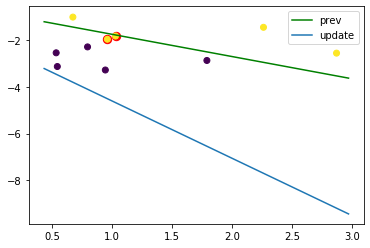

epoch =  51 Final


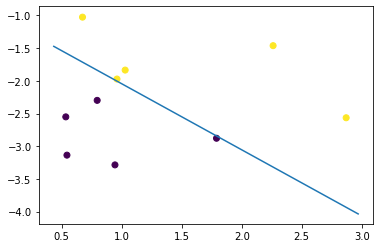

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False


In [3]:
xs, labels = generate_data(10, random_rate = 0)
w = PLA(xs, labels, epochs=1000)
len_of_data, dim = xs.shape
for idx in range(len_of_data):
    print(idx, np.sign(np.dot(xs[idx], w[1:]) + w[0]) != labels[idx])

data:


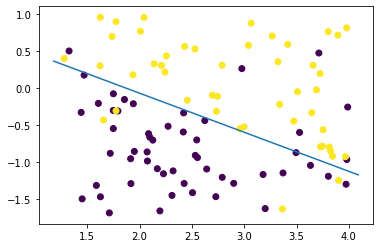

epoch =  9999 Final


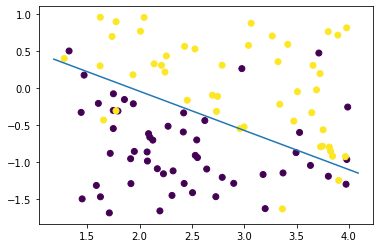

0 False
1 True
2 True
3 False
4 False
5 False
6 True
7 False
8 False
9 True
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 True
32 False
33 False
34 False
35 True
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 True
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 True
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 True
73 False
74 False
75 False
76 False
77 False
78 False
79 True
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False


In [4]:
xs, labels = generate_data(100, random_rate = 0.1)
w = PLA(xs, labels, history_draw = False, epochs=10000)
len_of_data, dim = xs.shape
for idx in range(len_of_data):
    print(idx, np.sign(np.dot(xs[idx], w[1:]) + w[0]) != labels[idx])

In [5]:
xs_0, labels_0 = generate_data(10, dim=3)
w_0 = PLA(xs_0, labels_0)
len_of_data, dim = xs_0.shape
for idx in range(len_of_data):
    print(idx, (np.dot(xs_0[idx], w_0[1:]) + w_0[0]) * labels_0[idx] < 0)

epoch =  1111 Final
0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False


In [12]:
%matplotlib widget
from matplotlib.widgets import Cursor, Button
from IPython.display import clear_output
# xs = np.array([[1.,0.], [0.,1.]])
fig, ax = plt.subplots()
xs, _ = generate_data(10, draw = False)
len_of_data, dim = xs.shape
w = np.array([2,-3,5])
correct_indexs = []
mistake_indexs = []
for j in range(len_of_data):
    if np.sign(np.dot(xs[j], w[1:]) + w[0])< 0:
        mistake_indexs.append(j)
    else:
        correct_indexs.append(j)

# plt.scatter(xs[:, 0], xs[:, 1])
labels1 = np.ones(len_of_data).astype(float)
for j in range(len_of_data):
    if j in mistake_indexs:
        labels1[j] = -1
plt.scatter(xs[:, 0], xs[:, 1], c=labels1)


x = np.linspace(min(xs[:, 0])-0.1, max(xs[:, 0])+0.1, 2)
if round(w[2],8) == 0.:
    plt.plot(x, -1 * (x * w[1] + w[0])/0.1)
else:
    plt.plot(x, -1 * (x * w[1] + w[0])/w[2])

cursor = Cursor(ax,
                horizOn=True, # Controls the visibility of the horizontal line
                vertOn=True, # Controls the visibility of the vertical line
                color='green',
                linewidth=2.0
               )
def onclick(event):
    # clear_output()
    global xs
    x1, y1 = event.xdata, event.ydata
    xs = np.append(xs, [[x1, y1]], axis=0)
    if np.sign(np.dot(xs[len(xs)-1], w[1:]) + w[0]) >= 0:
        plt.scatter(x1, y1, color='r')
    else:
        plt.scatter(x1, y1, color='g')
fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

FigureCanvasNbAgg()